In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import glob

In [80]:
USE_FAKE_TIME = True

In [81]:
file_patterns = {
    "angles": "angles.csv",
    "eulerd": "euler_mfx_direct.csv",
    "eulerq": "euler_from_quat.csv",
    "quat": "quat.csv",
    "temp": "temperature.csv",
    "raw": "raw.csv"
}

datasets = {}
for data_type, pattern in file_patterns.items():
    files = glob.glob(pattern)
    if files:
        latest_file = max(files, key=lambda x: Path(x).stat().st_mtime)
        print(f"Loading {data_type}: {latest_file}")
        df = pd.read_csv(latest_file)
        datasets[data_type] = df
        print(f"  Loaded {len(df)} {data_type} samples")
df_angles = datasets['angles']
df_eulerd = datasets['eulerd']
df_eulerq = datasets['eulerq']
df_quater = datasets['quat']
df_temper = datasets['temp']
df_rawdat = datasets['raw']

Loading angles: angles.csv
  Loaded 802 angles samples
Loading eulerd: euler_mfx_direct.csv
  Loaded 803 eulerd samples
Loading eulerq: euler_from_quat.csv
  Loaded 803 eulerq samples
Loading quat: quat.csv
  Loaded 803 quat samples
Loading temp: temperature.csv
  Loaded 0 temp samples
Loading raw: raw.csv
  Loaded 802 raw samples


In [82]:
df_rawdat.head()

,timestamp,partial_time,device_time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,status
0,0.159220,2279.86,2404307670,299.0,-934.0,-262.0,0.419,-0.769,-0.56,NaN
1,0.332201,2280.40,2404490355,298.0,-935.0,-262.0,0.419,-0.699,-0.56,MONITORING
2,0.507343,2280.22,2404682655,299.0,-934.0,-261.0,0.419,-0.769,-0.56,MONITORING
3,0.688686,2280.39,2404865340,298.0,-935.0,-264.0,0.490,-0.769,-0.56,MONITORING
4,0.856620,2280.56,2405048025,298.0,-936.0,-262.0,0.419,-0.769,-0.56,MONITORING



ANGLES DATA:
Shape: (802, 7)
Columns: ['timestamp', 'partial_time', 'device_time', 'angle_x', 'angle_y', 'angle_z', 'status']
Time range: 0.2 to 138.8 ms

EULERD DATA:
Shape: (803, 7)
Columns: ['timestamp', 'partial_time', 'device_time', 'x', 'y', 'z', 'status']
Time range: 0.0 to 138.8 ms

EULERQ DATA:
Shape: (803, 7)
Columns: ['timestamp', 'partial_time', 'device_time', 'x', 'y', 'z', 'status']
Time range: 0.0 to 138.8 ms

QUAT DATA:
Shape: (803, 12)
Columns: ['timestamp', 'partial_time', 'device_time', 'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'status']
Time range: 0.0 to 138.8 ms

TEMP DATA:
Shape: (0, 5)
Columns: ['timestamp', 'partial_time', 'device_time', 'temperature', 'status']

RAW DATA:
Shape: (802, 10)
Columns: ['timestamp', 'partial_time', 'device_time', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'status']
Time range: 0.2 to 138.8 ms
acc_x - Mean: 298.83, Std Dev: 1.06, Median: 299.00, Min: 287.00, Max: 302.00
  3 Noise Floor acc_x: 0.00319454 mg
acc_y

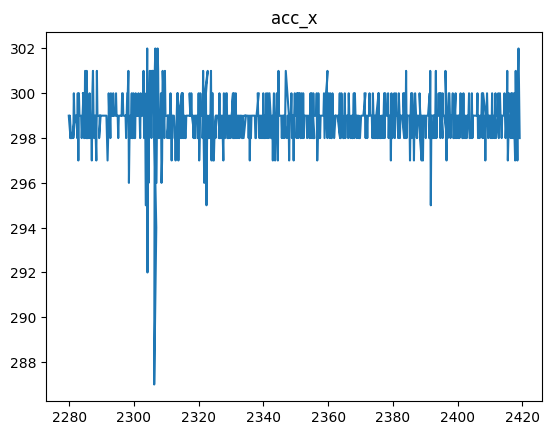

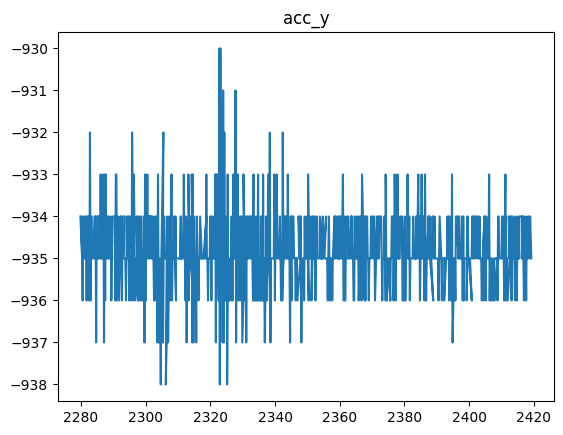

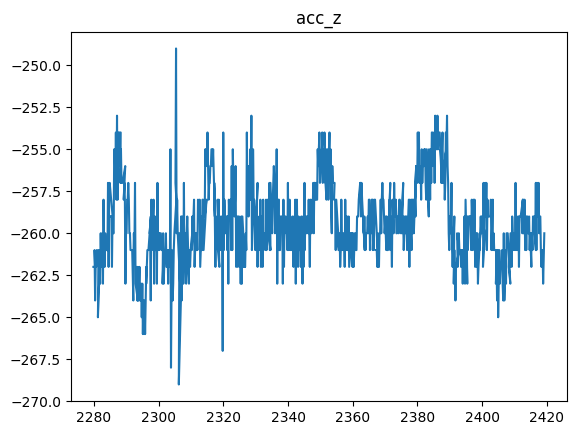

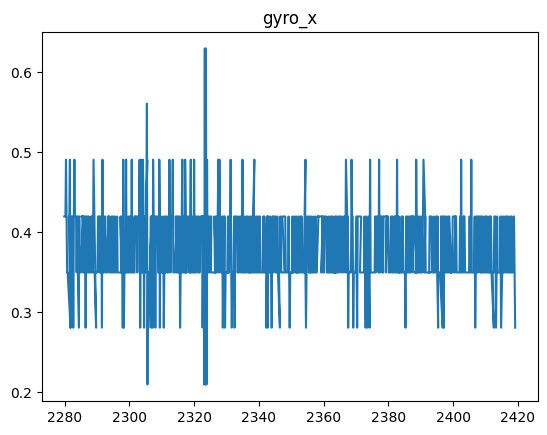

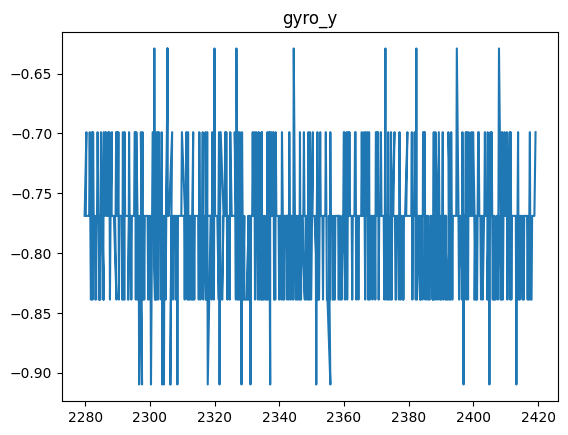

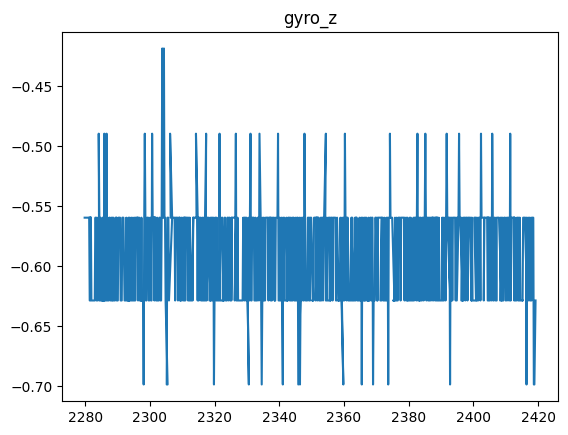

In [83]:
for name, dataset in datasets.items():
    if dataset is not None:
        print(f"\n{name.upper()} DATA:")
        print(f"Shape: {dataset.shape}")
        print(f"Columns: {list(dataset.columns)}")
        if len(dataset) > 0:
            print(f"Time range: {dataset['timestamp'].min():.1f} to {dataset['timestamp'].max():.1f} ms")

def statistical_analysis_raw_data(df, sensors=None):

    if sensors is None:
        sensors = ['accel_x_mg', 'accel_y_mg', 'accel_z_mg', 'gyro_x_dps', 'gyro_y_dps', 'gyro_z_dps']
    mag_acc = 0
    mag_gyr = 0
    for sensor in sensors:
        mean = df[sensor].mean()
        std_dev = df[sensor].std()
        median = df[sensor].median()
        min_val = df[sensor].min()
        max_val = df[sensor].max()
        print(f"{sensor} - Mean: {mean:.2f}, Std Dev: {std_dev:.2f}, Median: {median:.2f}, Min: {min_val:.2f}, Max: {max_val:.2f}")
        if 'acc' in sensor:
            noise_floor = 3 * (std_dev / 1000)
            print(f"  3 Noise Floor {sensor}: {noise_floor:.8f} mg")
            mag_acc += (mean*mean)
        elif 'gyro' in sensor:
            noise_floor = 3 * (std_dev * np.pi / 180)
            print(f"  3 Noise Floor {sensor}: {noise_floor:.8f} mg")
            mag_gyr += (mean*mean)
    mag_acc = np.sqrt(mag_acc)
    mag_gyr = np.sqrt(mag_gyr)
    print(f"\nMagnitude of Acceleration: {mag_acc:.2f} mg")
    print(f"Magnitude of Gyroscope: {mag_gyr:.2f} dps")
    
sensors = ["acc_x", "acc_y", "acc_z", "gyro_x", "gyro_y", "gyro_z"]
statistical_analysis_raw_data(df_rawdat, sensors)

for col in sensors:
    plt.title(col)
    plt.plot(df_rawdat['partial_time'], df_rawdat[col])
    plt.show()

In [84]:
# file_patterns = {
#     "angles": "angles_data_*",
#     "eulerd": "euler_direct_data_*",
#     "eulerq": "euler_quat_data_*"
# }

# datasets = {}
# for data_type, pattern in file_patterns.items():
#     files = glob.glob(pattern)
#     if files:
#         latest_file = max(files, key=lambda x: Path(x).stat().st_mtime)
#         print(f"Loading {data_type}: {latest_file}")
#         df = pd.read_csv(latest_file)
#         datasets[data_type] = df
#         print(f"  Loaded {len(df)} {data_type} samples")
# df_angles = datasets['angles']
# df_eulerd = datasets['eulerd']
# df_eulerq = datasets['eulerq']
            

In [85]:
# timestamps = np.arange(0, len(df_angles['altitude_angle']), 104)
# plt.figure(figsize=(12, 6))
# plt.plot(df_angles['altitude_angle'], label='Altitude Angle')
# plt.plot(df_angles['azimuth_angle'], label='Azimuth Angle')
# plt.xlabel('Time (s)')
# plt.ylabel('Angle (degrees)')
# plt.title('Altitude and Azimuth Angles Over Time')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

In [86]:
def load_latest_data():
    """Load all the latest motion data files"""
    file_patterns = {
        'quaternions': "*_quaternions.csv", 
        'raw_data': "*_raw_data.csv",
        'gyro_bias': "*_gyro_bias.csv",
        'temperature': "*_temperature.csv",
        'angles': "*_angles.csv"
    }
    
    datasets = {}
    
    for data_type, pattern in file_patterns.items():
        files = glob.glob(pattern)
        if files:
            latest_file = max(files, key=lambda x: Path(x).stat().st_mtime)
            print(f"Loading {data_type}: {latest_file}")
            df = pd.read_csv(latest_file)
            datasets[data_type] = df
            print(f"  Loaded {len(df)} {data_type} samples")
            if "timestamp_us" in df.columns:
                df["time_min"] = (df["timestamp_us"] - df["timestamp_us"].min()) / 1e6 / 60
            else:
                df["time_min"] = (df["timestamp"] - df["timestamp"].min()) / 1e6 / 60
            # Print unique values for categorical columns
            if data_type == 'quaternions' and 'type' in df.columns:
                print(f"  Quaternion types: {df['type'].unique()}")
            elif data_type == 'gyro_bias' and 'bias_type' in df.columns:
                print(f"  Bias types: {df['bias_type'].unique()}")
        else:
            print(f"No {data_type} files found")
            datasets[data_type] = None
    
    return datasets

data = load_latest_data()
df = data['angles']
df_quats = data['quaternions'] 
df_raw = data['raw_data']
df_gyro_bias = data['gyro_bias']
df_temp = data['temperature']

Loading quaternions: motion_data_20250822_190937_quaternions.csv
  Loaded 195574 quaternions samples
  Quaternion types: ['MFX']
Loading raw_data: motion_data_20250822_190937_raw_data.csv
  Loaded 1955740 raw_data samples
No gyro_bias files found
No temperature files found
Loading angles: motion_data_20250822_190937_angles.csv
  Loaded 195574 angles samples


In [87]:
df.head()

,timestamp_us,relative_time_ms,altitude,azimuth,zenith,time_min
0,133840800,0.0,-0.002,-0.000,-0.001,2.230338
1,134033100,192.3,-0.010,-0.004,-0.006,2.233543
2,134225400,384.6,-0.009,-0.006,-0.026,2.236748
3,134417700,576.9,-0.014,-0.001,-0.004,2.239953
4,134610000,769.2,-0.015,0.000,0.004,2.243158


In [88]:
for name, dataset in data.items():
    if dataset is not None:
        print(f"\n{name.upper()} DATA:")
        print(f"Shape: {dataset.shape}")
        print(f"Columns: {list(dataset.columns)}")
        if len(dataset) > 0:
            print(f"Time range expected: {dataset['time_min'].iloc[0]:.1f} to {dataset['time_min'].iloc[-1]:.1f} min")
            print(f"Time range actual: {dataset['time_min'].min():.1f} to {dataset['time_min'].max():.1f} min")


QUATERNIONS DATA:
Shape: (195574, 9)
Columns: ['timestamp_us', 'relative_time_ms', 'type', 'w', 'x', 'y', 'z', 'magnitude', 'time_min']
Time range expected: 2.2 to 56.4 min
Time range actual: 0.0 to 71.6 min

RAW_DATA DATA:
Shape: (1955740, 11)
Columns: ['timestamp_us', 'relative_time_ms', 'accel_x_mg', 'accel_y_mg', 'accel_z_mg', 'gyro_x_dps', 'gyro_y_dps', 'gyro_z_dps', 'accel_magnitude', 'gyro_magnitude', 'time_min']
Time range expected: 2.2 to 56.4 min
Time range actual: 0.0 to 71.6 min

ANGLES DATA:
Shape: (195574, 6)
Columns: ['timestamp_us', 'relative_time_ms', 'altitude', 'azimuth', 'zenith', 'time_min']
Time range expected: 2.2 to 56.4 min
Time range actual: 0.0 to 71.6 min


accel_x_mg - Mean: 143.81, Std Dev: 8.41, Median: 144.00, Min: -506.00, Max: 595.00
  3 Noise Floor accel_x_mg: 0.02523487 mg
accel_y_mg - Mean: -986.05, Std Dev: 18.66, Median: -987.00, Min: -1105.00, Max: -583.00
  3 Noise Floor accel_y_mg: 0.05596868 mg
accel_z_mg - Mean: -180.93, Std Dev: 35.77, Median: -178.00, Min: -1209.00, Max: 80.00
  3 Noise Floor accel_z_mg: 0.10730131 mg
gyro_x_dps - Mean: 397.88, Std Dev: 341.19, Median: 420.00, Min: -80570.00, Max: 49910.00
  3 Noise Floor gyro_x_dps: 17.86466886 mg
gyro_y_dps - Mean: -772.49, Std Dev: 630.87, Median: -770.00, Min: -73010.00, Max: 61880.00
  3 Noise Floor gyro_y_dps: 33.03248105 mg
gyro_z_dps - Mean: -591.23, Std Dev: 173.90, Median: -560.00, Min: -16730.00, Max: 16660.00
  3 Noise Floor gyro_z_dps: 9.10555112 mg

Magnitude of Acceleration: 1012.78 mg
Magnitude of Gyroscope: 1051.00 dps


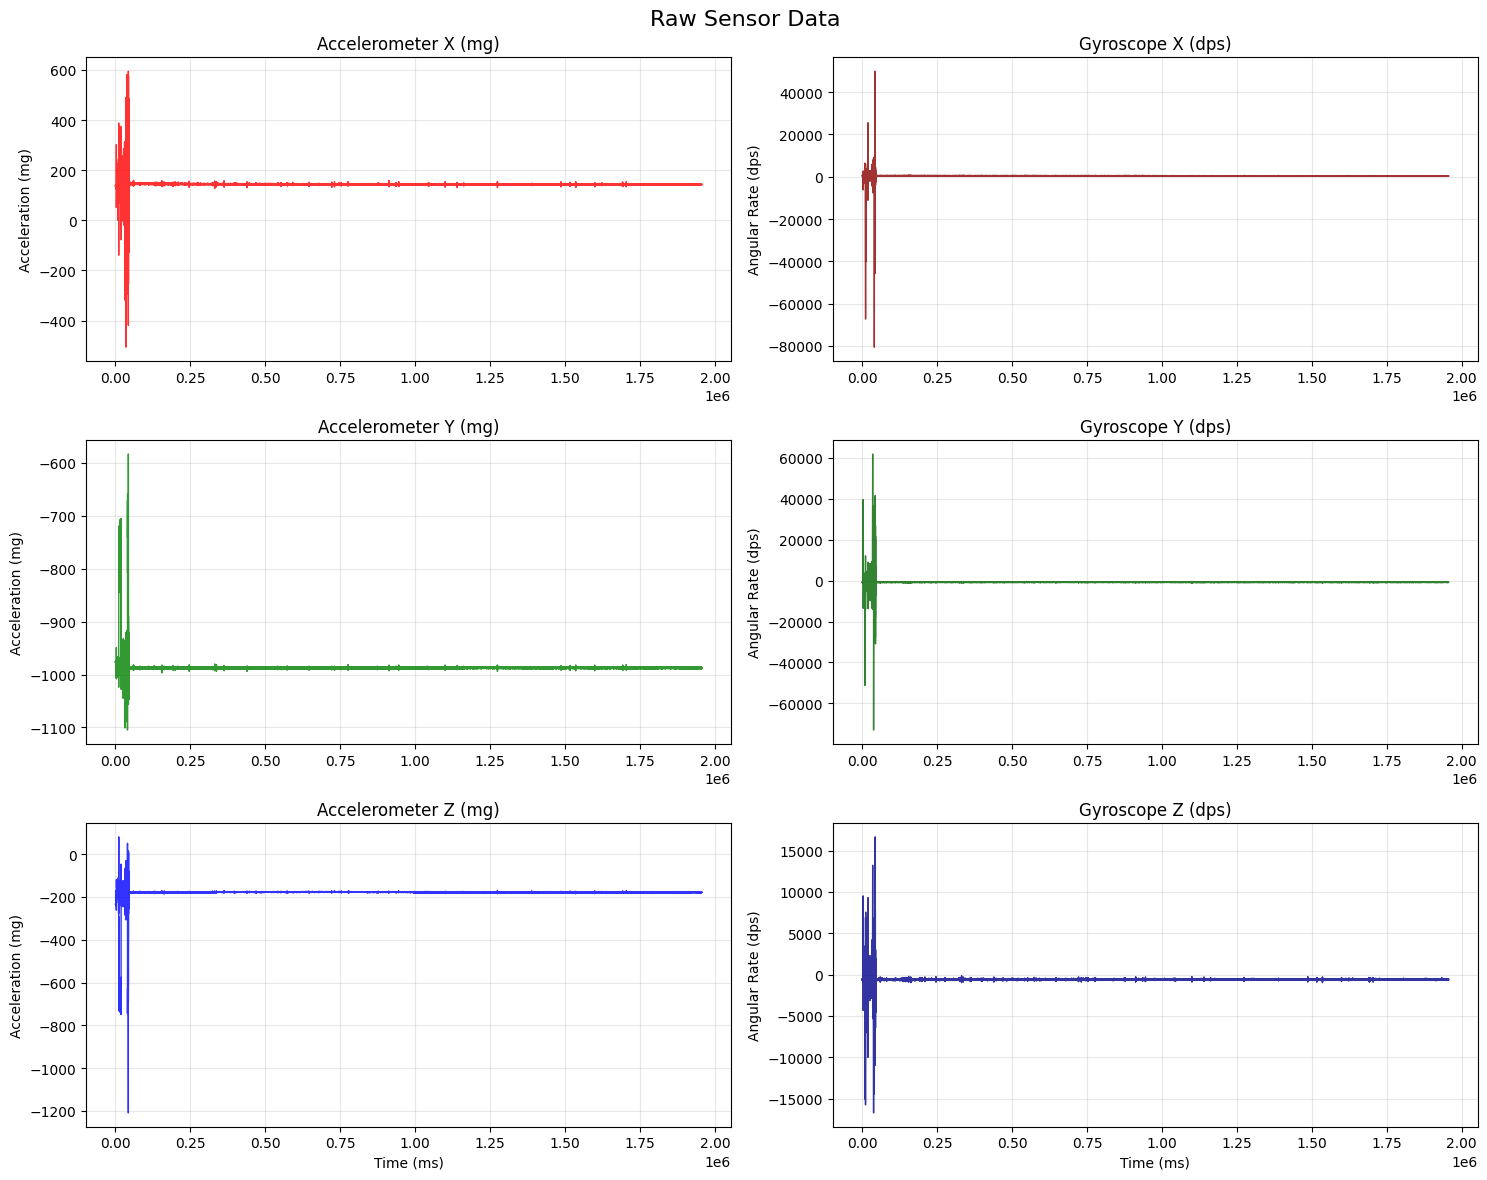

In [89]:
def plot_raw_sensor_data(df_raw, title="Raw Sensor Data"):
    """Plot accelerometer and gyroscope data"""
    if df_raw is None or len(df_raw) == 0:
        print("No raw sensor data available")
        return
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle(title, fontsize=16)
    
    time_ms = df_raw['relative_time_ms']
    if USE_FAKE_TIME:
        time_ms = list(range(len(df_raw)))
    
    # Accelerometer data
    accel_colors = ['red', 'green', 'blue']
    accel_axes = ['accel_x_mg', 'accel_y_mg', 'accel_z_mg']
    for i, (axis, color) in enumerate(zip(accel_axes, accel_colors)):
        axes[i, 0].plot(time_ms, df_raw[axis], color=color, alpha=0.8, linewidth=1)
        axes[i, 0].set_title(f'Accelerometer {axis.split("_")[1].upper()} (mg)')
        axes[i, 0].set_ylabel('Acceleration (mg)')
        axes[i, 0].grid(True, alpha=0.3)
    
    # Gyroscope data
    gyro_colors = ['darkred', 'darkgreen', 'darkblue']
    gyro_axes = ['gyro_x_dps', 'gyro_y_dps', 'gyro_z_dps']
    for i, (axis, color) in enumerate(zip(gyro_axes, gyro_colors)):
        axes[i, 1].plot(time_ms, df_raw[axis], color=color, alpha=0.8, linewidth=1)
        axes[i, 1].set_title(f'Gyroscope {axis.split("_")[1].upper()} (dps)')
        axes[i, 1].set_ylabel('Angular Rate (dps)')
        axes[i, 1].grid(True, alpha=0.3)
    
    # Set x-axis labels for bottom plots
    axes[2, 0].set_xlabel('Time (ms)')
    axes[2, 1].set_xlabel('Time (ms)')
    
    plt.tight_layout()
    plt.show()
def statistical_analysis_raw_data(df):

    sensors = ['accel_x_mg', 'accel_y_mg', 'accel_z_mg', 'gyro_x_dps', 'gyro_y_dps', 'gyro_z_dps']
    mag_acc = 0
    mag_gyr = 0
    for sensor in sensors:
        mean = df[sensor].mean()
        std_dev = df[sensor].std()
        median = df[sensor].median()
        min_val = df[sensor].min()
        max_val = df[sensor].max()
        print(f"{sensor} - Mean: {mean:.2f}, Std Dev: {std_dev:.2f}, Median: {median:.2f}, Min: {min_val:.2f}, Max: {max_val:.2f}")
        if 'accel' in sensor:
            noise_floor = 3 * (std_dev / 1000)
            print(f"  3 Noise Floor {sensor}: {noise_floor:.8f} mg")
            mag_acc += mean**2
        elif 'gyro' in sensor:
            noise_floor = 3 * (std_dev * np.pi / 180)
            print(f"  3 Noise Floor {sensor}: {noise_floor:.8f} mg")
            mag_gyr += mean**2
    mag_acc = np.sqrt(mag_acc)
    mag_gyr = np.sqrt(mag_gyr)
    print(f"\nMagnitude of Acceleration: {mag_acc:.2f} mg")
    print(f"Magnitude of Gyroscope: {mag_gyr:.2f} dps")
    
statistical_analysis_raw_data(df_raw)
plot_raw_sensor_data(df_raw)


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_accel_angles_wds(df):
    RAD_TO_DEG = 180.0 / np.pi
    
    # Convert mg to g
    ax = df['accel_x_mg'] / 1000.0  # West
    ay = df['accel_y_mg'] / 1000.0  # Down  
    az = df['accel_z_mg'] / 1000.0  # South
    
    # For WDS orientation:
    # Roll: rotation around X-axis (West) - tilt left/right when facing South
    roll = np.arctan2(-az, -ay) * RAD_TO_DEG
    
    # Pitch: rotation around Y-axis (Down) - tilt forward/backward when facing South
    pitch = np.arctan2(ax, np.sqrt(ay**2 + az**2)) * RAD_TO_DEG
    
    # Yaw: rotation around Z-axis (South) - valid for tilted sensor mount
    # Uses gravity components on X and Y axes as reference
    yaw = np.arctan2(ax, -ay) * RAD_TO_DEG
    
    return roll, pitch, yaw

def remove_gyro_bias_simple(df, static_seconds=5.0):
    static_mask = df['relative_time_ms'] < (static_seconds * 1000)
    
    bias_x = df.loc[static_mask, 'gyro_x_dps'].mean()
    bias_y = df.loc[static_mask, 'gyro_y_dps'].mean() 
    bias_z = df.loc[static_mask, 'gyro_z_dps'].mean()
    
    print(f"Gyro bias: X={bias_x:.3f}, Y={bias_y:.3f}, Z={bias_z:.3f} dps")
    
    return (df['gyro_x_dps'] - bias_x, 
            df['gyro_y_dps'] - bias_y, 
            df['gyro_z_dps'] - bias_z)

def integrate_gyro_to_angles(df, sample_rate_hz=104):
    gyro_x_clean, gyro_y_clean, gyro_z_clean = remove_gyro_bias_simple(df)
    
    dt = 1.0 / sample_rate_hz
    
    # Cumulative integration (will show drift)
    gyro_roll_integrated = np.cumsum(gyro_x_clean) * dt
    gyro_pitch_integrated = np.cumsum(gyro_y_clean) * dt  
    gyro_yaw_integrated = np.cumsum(gyro_z_clean) * dt
    
    return gyro_roll_integrated, gyro_pitch_integrated, gyro_yaw_integrated

def complementary_filter_simple(accel_angles, gyro_rates, alpha=0.98, sample_rate_hz=104):
    """
    Simple complementary filter: alpha*gyro + (1-alpha)*accel
    """
    accel_roll, accel_pitch, accel_yaw = accel_angles
    gyro_x_clean, gyro_y_clean, gyro_z_clean = gyro_rates
    
    dt = 1.0 / sample_rate_hz
    
    # Initialize with accelerometer
    filt_roll = np.zeros(len(accel_roll))
    filt_pitch = np.zeros(len(accel_pitch))
    filt_yaw = np.zeros(len(accel_yaw))
    
    filt_roll[0] = accel_roll.iloc[0]
    filt_pitch[0] = accel_pitch.iloc[0] 
    filt_yaw[0] = accel_yaw.iloc[0]
    
    # Apply filter
    for i in range(1, len(filt_roll)):
        filt_roll[i] = alpha * (filt_roll[i-1] + gyro_x_clean.iloc[i] * dt) + (1-alpha) * accel_roll.iloc[i]
        filt_pitch[i] = alpha * (filt_pitch[i-1] + gyro_y_clean.iloc[i] * dt) + (1-alpha) * accel_pitch.iloc[i]
        filt_yaw[i] = alpha * (filt_yaw[i-1] + gyro_z_clean.iloc[i] * dt) + (1-alpha) * accel_yaw.iloc[i]
    
    return filt_roll, filt_pitch, filt_yaw

def analyze_gyro_drift_effects(df_raw_, title="Gyroscope Drift Analysis", gyro_is_mdps=False):
    if gyro_is_mdps:
        df_raw = df_raw_.copy()
        df_raw[['gyro_x_dps', 'gyro_y_dps', 'gyro_z_dps']] /= 1000
    
    # Calculate all angle estimates
    accel_roll, accel_pitch, accel_yaw = calculate_accel_angles_wds(df_raw)
    gyro_roll_int, gyro_pitch_int, gyro_yaw_int = integrate_gyro_to_angles(df_raw)
    gyro_rates = remove_gyro_bias_simple(df_raw)
    filt_roll, filt_pitch, filt_yaw = complementary_filter_simple(
        (accel_roll, accel_pitch, accel_yaw), gyro_rates, alpha=0.98
    )
    time_s = list(np.arange(0, len(df_raw['relative_time_ms']))*104)
    # Create comprehensive comparison plot
    fig, axes = plt.subplots(3, 1, figsize=(12, 10))
    fig.suptitle(title, fontsize=16)
    
    # ROLL COMPARISON
    axes[0].plot(time_s, accel_roll, 'b-', label='Accelerometer Only', linewidth=2, alpha=0.8)
    axes[0].plot(time_s, gyro_roll_int, 'r--', label='Gyroscope Integrated', linewidth=2, alpha=0.8)
    axes[0].plot(time_s, filt_roll, 'k-', label='Complementary Filter', linewidth=2, alpha=0.9)
    axes[0].set_ylabel('Roll Angle (deg)')
    axes[0].set_title('Roll (Tilt Left/Right) - Should be Stable for Static Sensor')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim([-5, 20])
    
    # PITCH COMPARISON  
    axes[1].plot(time_s, accel_pitch, 'b-', label='Accelerometer Only', linewidth=2, alpha=0.8)
    axes[1].plot(time_s, gyro_pitch_int, 'r--', label='Gyroscope Integrated', linewidth=2, alpha=0.8)
    axes[1].plot(time_s, filt_pitch, 'k-', label='Complementary Filter', linewidth=2, alpha=0.9)
    axes[1].set_ylabel('Pitch Angle (deg)')
    axes[1].set_title('Pitch (Tilt Forward/Backward) - Should be Stable for Static Sensor')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim([-10, 20])
    
    # YAW COMPARISON (includes accelerometer reference)
    axes[2].plot(time_s, accel_yaw, 'b-', label='Accelerometer Only', linewidth=2, alpha=0.8)
    axes[2].plot(time_s, gyro_yaw_int, 'r--', label='Gyroscope Integrated', linewidth=2, alpha=0.8)
    axes[2].plot(time_s, filt_yaw, 'k-', label='Complementary Filter', linewidth=2, alpha=0.9)
    axes[2].axhline(y=0, color='gray', linestyle=':', alpha=0.5, label='Reference Zero')
    axes[2].set_ylabel('Yaw Angle (deg)')
    axes[2].set_title('Yaw (Azimuth) - Accelerometer Reference Available for Tilted Sensor')
    axes[2].set_xlabel('Time (s)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate drift rates (degrees per minute)
    duration_min = time_s[-1] / 60.0
    
    roll_accel_drift = abs(accel_roll.iloc[-1] - accel_roll.iloc[0]) / duration_min
    roll_gyro_drift = abs(gyro_roll_int[len(gyro_roll_int)-1] - gyro_roll_int[0]) / duration_min
    
    pitch_accel_drift = abs(accel_pitch.iloc[-1] - accel_pitch.iloc[0]) / duration_min  
    pitch_gyro_drift = abs(gyro_pitch_int[len(gyro_pitch_int)-1] - gyro_pitch_int[0]) / duration_min
    
    yaw_accel_drift = abs(accel_yaw.iloc[-1] - accel_yaw.iloc[0]) / duration_min
    yaw_gyro_drift = abs(gyro_yaw_int[len(gyro_yaw_int) - 1] - gyro_yaw_int[0]) / duration_min
    
    print(f"Test Duration: {duration_min:.1f} minutes")
    print(f"\nROLL DRIFT:")
    print(f"  Accelerometer: {roll_accel_drift:.3f} deg/min")
    print(f"  Gyroscope:     {roll_gyro_drift:.3f} deg/min")
    print(f"  Ratio (Gyro/Accel): {roll_gyro_drift/max(roll_accel_drift, 0.001):.1f}x")
    
    print(f"\nPITCH DRIFT:")
    print(f"  Accelerometer: {pitch_accel_drift:.3f} deg/min") 
    print(f"  Gyroscope:     {pitch_gyro_drift:.3f} deg/min")
    print(f"  Ratio (Gyro/Accel): {pitch_gyro_drift/max(pitch_accel_drift, 0.001):.1f}x")
    
    print(f"\nYAW DRIFT:")
    print(f"  Accelerometer: {yaw_accel_drift:.3f} deg/min")
    print(f"  Gyroscope:     {yaw_gyro_drift:.3f} deg/min")
    print(f"  Ratio (Gyro/Accel): {yaw_gyro_drift/max(yaw_accel_drift, 0.001):.1f}x")
    
    # Stability assessment
    accel_roll_std = accel_roll.std()
    accel_pitch_std = accel_pitch.std()
    accel_yaw_std = accel_yaw.std()
    
    print(f"Accelerometer Stability:")
    print(f"  Roll StdDev:  {accel_roll_std:.3f}deg ({'GOOD' if accel_roll_std < 0.1 else 'POOR'})")
    print(f"  Pitch StdDev: {accel_pitch_std:.3f}deg ({'GOOD' if accel_pitch_std < 0.1 else 'POOR'})")
    print(f"  Yaw StdDev:   {accel_yaw_std:.3f}deg ({'GOOD' if accel_yaw_std < 0.1 else 'POOR'})")
    
    gyro_roll_std = np.std(np.diff(gyro_roll_int))
    gyro_pitch_std = np.std(np.diff(gyro_pitch_int))
    gyro_yaw_std = np.std(np.diff(gyro_yaw_int))
    print(f"Gyroscope Rate StdDev:")
    print(f"  Roll:  {gyro_roll_std:.3f}deg/sample ({'GOOD' if gyro_roll_std < 0.01 else 'POOR'})")
    print(f"  Pitch: {gyro_pitch_std:.3f}deg/sample ({'GOOD' if gyro_pitch_std < 0.01 else 'POOR'})")
    print(f"  Yaw:   {gyro_yaw_std:.3f}deg/sample ({'GOOD' if gyro_yaw_std < 0.01 else 'POOR'})")
    
    # Return data for further analysis
    return {
        'accel': (accel_roll, accel_pitch, accel_yaw),
        'gyro_integrated': (gyro_roll_int, gyro_pitch_int, gyro_yaw_int), 
        'filtered': (filt_roll, filt_pitch, filt_yaw),
        'time_s': time_s
    }

In [91]:
df_raw.head()

,timestamp_us,relative_time_ms,accel_x_mg,accel_y_mg,accel_z_mg,gyro_x_dps,gyro_y_dps,gyro_z_dps,accel_magnitude,gyro_magnitude,time_min
0,133840800,0.00,137.0,-976.0,-234.0,420.0,-770.0,-560.0,1012.966436,1040.624812,2.230659
1,133860030,19.23,137.0,-977.0,-233.0,420.0,-770.0,-630.0,1013.699660,1079.907403,2.230979
2,133879260,38.46,137.0,-976.0,-234.0,490.0,-770.0,-630.0,1012.966436,1109.008566,2.231300
3,133898490,57.69,137.0,-976.0,-234.0,490.0,-770.0,-630.0,1012.966436,1109.008566,2.231620
4,133917720,76.92,137.0,-977.0,-234.0,420.0,-770.0,-560.0,1013.929978,1040.624812,2.231941


Gyro bias: X=0.397, Y=-0.775, Z=-0.592 dps
Gyro bias: X=0.397, Y=-0.775, Z=-0.592 dps


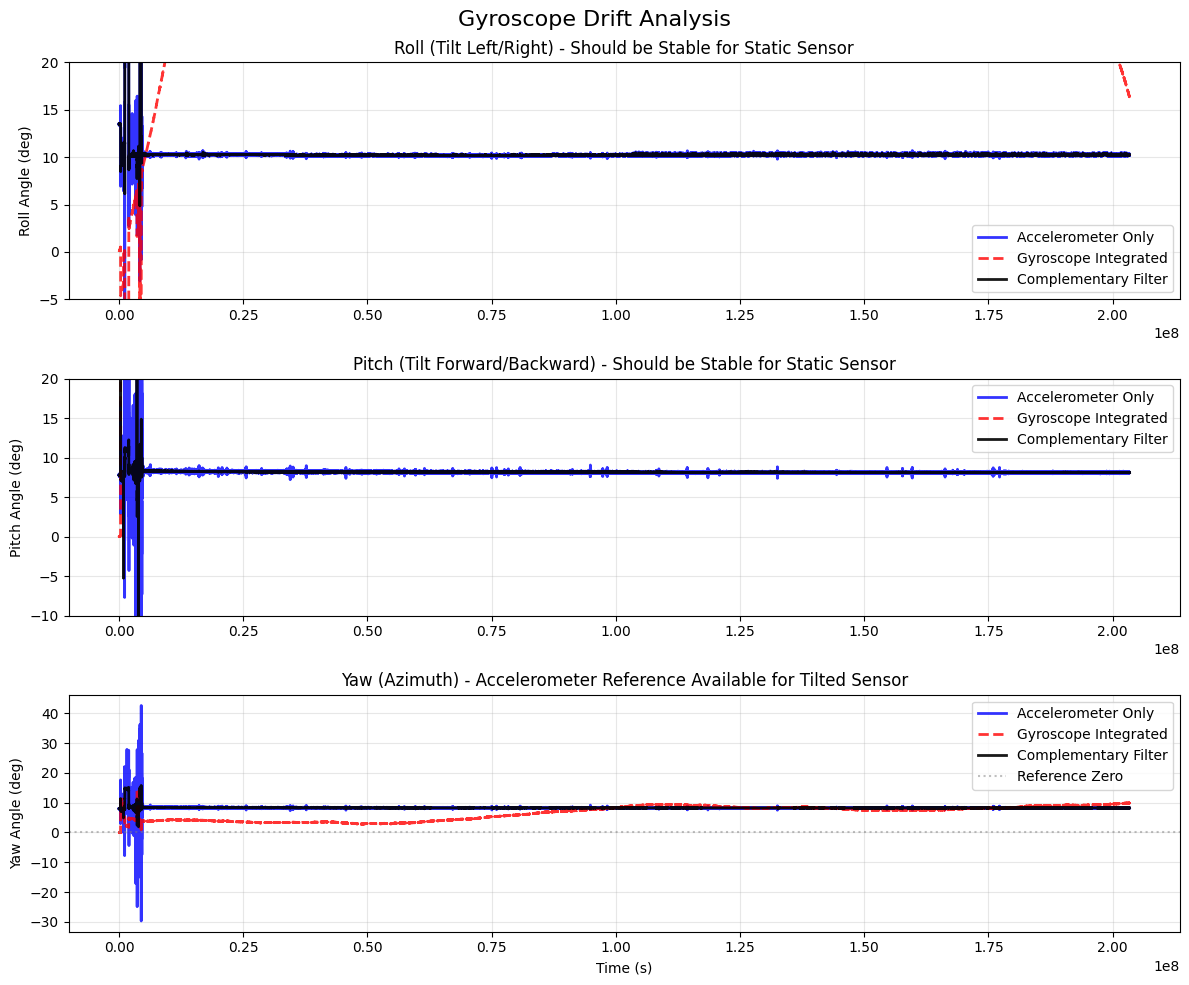

Test Duration: 3389947.6 minutes

ROLL DRIFT:
  Accelerometer: 0.000 deg/min
  Gyroscope:     0.000 deg/min
  Ratio (Gyro/Accel): 0.0x

PITCH DRIFT:
  Accelerometer: 0.000 deg/min
  Gyroscope:     0.000 deg/min
  Ratio (Gyro/Accel): 0.0x

YAW DRIFT:
  Accelerometer: 0.000 deg/min
  Gyroscope:     0.000 deg/min
  Ratio (Gyro/Accel): 0.0x
Accelerometer Stability:
  Roll StdDev:  2.342deg (POOR)
  Pitch StdDev: 0.484deg (POOR)
  Yaw StdDev:   0.656deg (POOR)
Gyroscope Rate StdDev:
  Roll:  0.003deg/sample (GOOD)
  Pitch: 0.006deg/sample (GOOD)
  Yaw:   0.002deg/sample (GOOD)


In [92]:
results = analyze_gyro_drift_effects(df_raw, gyro_is_mdps=True)

In [93]:
def plot_gyro_bias_analysis(df_gyro_bias, title="Gyroscope Bias Analysis"):
    """Analyze gyroscope bias for MDI and MFX"""
    if df_gyro_bias is None or len(df_gyro_bias) == 0:
        print("No gyro bias data available")
        return
    
    bias_types = df_gyro_bias['bias_type'].unique()
    n_types = len(bias_types)
    
    fig, axes = plt.subplots(n_types, 4, figsize=(16, 4*n_types))
    if n_types == 1:
        axes = axes.reshape(1, -1)
    
    fig.suptitle(title, fontsize=16)
    
    for i, bias_type in enumerate(bias_types):
        bias_data = df_gyro_bias[df_gyro_bias['bias_type'] == bias_type]
        time_ms = bias_data['relative_time_ms']
        if USE_FAKE_TIME:
            time_ms = list(range(len(bias_data)))
        
        # Plot each bias component
        bias_components = ['bias_x', 'bias_y', 'bias_z']
        colors = ['red', 'green', 'blue']
        
        for j, (comp, color) in enumerate(zip(bias_components, colors)):
            axes[i, j].plot(time_ms, bias_data[comp], color=color, alpha=0.8, linewidth=1)
            axes[i, j].set_title(f'{bias_type} - {comp.upper()} bias')
            axes[i, j].set_ylabel(f'{comp} bias (dps)')
            axes[i, j].grid(True, alpha=0.3)
            if i == n_types - 1:  # Bottom row
                axes[i, j].set_xlabel('Time (ms)')
        
        # Plot bias magnitude
        axes[i, 3].plot(time_ms, bias_data['bias_magnitude'], color='purple', alpha=0.8, linewidth=1)
        axes[i, 3].set_title(f'{bias_type} - Bias Magnitude')
        axes[i, 3].set_ylabel('Magnitude (dps)')
        axes[i, 3].grid(True, alpha=0.3)
        if i == n_types - 1:  # Bottom row
            axes[i, 3].set_xlabel('Time (ms)')
    
    plt.tight_layout()
    plt.show()
    
    # Print bias statistics
    print("GYRO BIAS STATISTICS")
    for bias_type in bias_types:
        bias_data = df_gyro_bias[df_gyro_bias['bias_type'] == bias_type]
        print(f"\n{bias_type} Bias:")
        for comp in ['bias_x', 'bias_y', 'bias_z']:
            mean_bias = bias_data[comp].mean()
            std_bias = bias_data[comp].std()
            print(f"  {comp}: {mean_bias:.4f} ± {std_bias:.4f} dps")
        print(f"  Magnitude: {bias_data['bias_magnitude'].mean():.4f} ± {bias_data['bias_magnitude'].std():.4f} dps")

plot_gyro_bias_analysis(df_gyro_bias)

No gyro bias data available


In [94]:
def compare_gyro_biases(df_gyro_bias, title="MDI vs MFX Gyro Bias Comparison"):
    """Compare MDI and MFX gyro biases"""
    if df_gyro_bias is None or len(df_gyro_bias) == 0:
        print("No gyro bias data available")
        return
    
    mdi_bias = df_gyro_bias[df_gyro_bias['bias_type'] == 'MDI']
    mfx_bias = df_gyro_bias[df_gyro_bias['bias_type'] == 'MFX']
    
    if len(mdi_bias) == 0 or len(mfx_bias) == 0:
        print("Need both MDI and MFX bias data for comparison")
        return
    
    # Align data by timestamp if possible
    merged = pd.merge(mdi_bias, mfx_bias, on='timestamp_us', suffixes=('_mdi', '_mfx'))
    
    if len(merged) == 0:
        print("No matching timestamps for bias comparison")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(title, fontsize=16)
    
    time_ms = merged['relative_time_ms_mdi']
    if USE_FAKE_TIME:
        time_ms = list(range(len(merged)))
    
    # Compare bias components
    components = ['bias_x', 'bias_y', 'bias_z']
    colors = ['red', 'green', 'blue']
    
    for i, (comp, color) in enumerate(zip(components, colors)):
        if i < 3:  # First 3 subplots
            row, col = divmod(i, 2)
            axes[row, col].plot(time_ms, merged[f'{comp}_mdi'], 
                               label=f'MDI {comp}', alpha=0.8, color=color)
            axes[row, col].plot(time_ms, merged[f'{comp}_mfx'], 
                               label=f'MFX {comp}', alpha=0.8, color=color, linestyle='--')
            axes[row, col].set_title(f'{comp.upper()} Bias Comparison')
            axes[row, col].set_ylabel('Bias (dps)')
            axes[row, col].legend()
            axes[row, col].grid(True, alpha=0.3)
    
    # Bias magnitude comparison
    axes[1, 1].plot(time_ms, merged['bias_magnitude_mdi'], 
                   label='MDI Magnitude', alpha=0.8, color='purple')
    axes[1, 1].plot(time_ms, merged['bias_magnitude_mfx'], 
                   label='MFX Magnitude', alpha=0.8, color='orange', linestyle='--')
    axes[1, 1].set_title('Bias Magnitude Comparison')
    axes[1, 1].set_ylabel('Magnitude (dps)')
    axes[1, 1].set_xlabel('Time (ms)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # # Calculate correlations
    # print("BIAS CORRELATION ANALYSIS")
    # print(components)
    # for comp in components:
    #     print(comp)
    #     print("#"*50)
    #     print(merged[f'{comp}_mdi'])
    #     print("#"*50)
    #     print(merged[f'{comp}_mfx'])
    #     print("#"*50)
    #     corr = merged[f'{comp}_mdi'].corr(merged[f'{comp}_mfx'])
    #     print(corr)
    #     print(f"{comp}: MDI vs MFX correlation = {corr:.4f}")

compare_gyro_biases(df_gyro_bias)

No gyro bias data available


In [95]:
def plot_temperature_analysis(df_temp, title="Temperature Analysis"):
    """Analyze temperature data"""
    if df_temp is None or len(df_temp) == 0:
        print("No temperature data available")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(title, fontsize=16)
    
    time_ms = df_temp['relative_time_ms']
    if USE_FAKE_TIME:
        time_ms = list(range(len(df_temp)))
    
    # Temperature over time
    axes[0, 0].plot(time_ms, df_temp['temperature_celsius'], color='red', alpha=0.8)
    axes[0, 0].set_title('Temperature Over Time')
    axes[0, 0].set_ylabel('Temperature (°C)')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Temperature distribution
    axes[0, 1].hist(df_temp['temperature_celsius'], bins=50, alpha=0.7, color='red')
    axes[0, 1].set_title('Temperature Distribution')
    axes[0, 1].set_xlabel('Temperature (°C)')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Temperature stability analysis (rolling standard deviation)
    window_size = min(50, len(df_temp)//10)  # Adaptive window size
    rolling_std = df_temp['temperature_celsius'].rolling(window=window_size).std()
    axes[1, 0].plot(time_ms, rolling_std, color='orange', alpha=0.8)
    axes[1, 0].set_title(f'Temperature Stability (Rolling Std, window={window_size})')
    axes[1, 0].set_ylabel('Rolling Std Dev (°C)')
    axes[1, 0].set_xlabel('Time (ms)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Temperature rate of change
    temp_rate = df_temp['temperature_celsius'].diff().abs()
    axes[1, 1].plot(time_ms[1:], temp_rate[1:], color='green', alpha=0.8)
    axes[1, 1].set_title('Temperature Rate of Change')
    axes[1, 1].set_ylabel('|ΔT| (°C)')
    axes[1, 1].set_xlabel('Time (ms)')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Temperature statistics
    temp_stats = df_temp['temperature_celsius'].describe()
    print("TEMPERATURE STATISTICS")
    print(f"Mean: {temp_stats['mean']:.2f}°C")
    print(f"Std Dev: {temp_stats['std']:.3f}°C")
    print(f"Range: {temp_stats['min']:.2f}°C to {temp_stats['max']:.2f}°C")
    print(f"Stability: {'STABLE' if temp_stats['std'] < 1.0 else 'VARIABLE'} (std < 1.0°C)")
    
    # Detect temperature trends
    if len(df_temp) > 10:
        slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(df_temp)), df_temp['temperature_celsius'])
        print(f"Temperature trend: {slope:.4f}°C per sample (R² = {r_value**2:.4f})")
        if abs(slope) > 0.01:
            trend = "INCREASING" if slope > 0 else "DECREASING"
            print(f"  {trend} temperature trend detected")
        else:
            print("  No significant temperature trend")

plot_temperature_analysis(df_temp)

No temperature data available


In [96]:
def correlate_temperature_with_sensors(df_temp, df_raw, df_gyro_bias):
    """Analyze how temperature affects sensor performance"""
    if df_temp is None or df_raw is None:
        print("Need both temperature and raw sensor data for correlation analysis")
        return
    
    # Merge temperature with raw data (simplified - assumes same sampling rate)
    min_len = min(len(df_temp), len(df_raw))
    
    if min_len < 10:
        print("Insufficient data for temperature correlation analysis")
        return
    
    # Take the first min_len samples from each dataset
    temp_data = df_temp['temperature_celsius'].iloc[:min_len]
    accel_mag = df_raw['accel_magnitude'].iloc[:min_len]
    gyro_mag = df_raw['gyro_magnitude'].iloc[:min_len]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Temperature vs Sensor Performance', fontsize=16)
    
    # Temperature vs Accelerometer magnitude
    axes[0].scatter(temp_data, accel_mag, alpha=0.6, s=20)
    accel_corr = temp_data.corr(accel_mag)
    axes[0].set_title(f'Temperature vs Accelerometer Magnitude\n(r = {accel_corr:.3f})')
    axes[0].set_xlabel('Temperature (°C)')
    axes[0].set_ylabel('Accel Magnitude (mg)')
    axes[0].grid(True, alpha=0.3)
    
    # Temperature vs Gyroscope magnitude
    axes[1].scatter(temp_data, gyro_mag, alpha=0.6, s=20, color='orange')
    gyro_corr = temp_data.corr(gyro_mag)
    axes[1].set_title(f'Temperature vs Gyroscope Magnitude\n(r = {gyro_corr:.3f})')
    axes[1].set_xlabel('Temperature (°C)')
    axes[1].set_ylabel('Gyro Magnitude (dps)')
    axes[1].grid(True, alpha=0.3)
    
    # Temperature vs Gyro bias (if available)
    if df_gyro_bias is not None and len(df_gyro_bias) > 0:
        bias_min_len = min(len(df_temp), len(df_gyro_bias))
        if bias_min_len > 5:
            temp_bias_data = df_temp['temperature_celsius'].iloc[:bias_min_len]
            bias_mag = df_gyro_bias['bias_magnitude'].iloc[:bias_min_len]
            
            axes[2].scatter(temp_bias_data, bias_mag, alpha=0.6, s=20, color='purple')
            bias_corr = temp_bias_data.corr(bias_mag)
            axes[2].set_title(f'Temperature vs Gyro Bias Magnitude\n(r = {bias_corr:.3f})')
            axes[2].set_xlabel('Temperature (°C)')
            axes[2].set_ylabel('Bias Magnitude (dps)')
            axes[2].grid(True, alpha=0.3)
        else:
            axes[2].text(0.5, 0.5, 'Insufficient\nBias Data', 
                        horizontalalignment='center', verticalalignment='center',
                        transform=axes[2].transAxes, fontsize=14)
            axes[2].set_title('Temperature vs Gyro Bias')
    else:
        axes[2].text(0.5, 0.5, 'No Bias Data\nAvailable', 
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[2].transAxes, fontsize=14)
        axes[2].set_title('Temperature vs Gyro Bias')
    
    plt.tight_layout()
    plt.show()
    
    print("TEMPERATURE CORRELATION ANALYSIS")
    print(f"Temperature vs Accelerometer magnitude: {accel_corr:.4f}")
    print(f"Temperature vs Gyroscope magnitude: {gyro_corr:.4f}")
    if df_gyro_bias is not None and len(df_gyro_bias) > 0 and bias_min_len > 5:
        print(f"Temperature vs Gyro bias magnitude: {bias_corr:.4f}")
    
    # Warn about high correlations
    if abs(accel_corr) > 0.5:
        print(f"WARNING: High temperature correlation with accelerometer ({accel_corr:.3f})")
    if abs(gyro_corr) > 0.5:
        print(f"WARNING: High temperature correlation with gyroscope ({gyro_corr:.3f})")

correlate_temperature_with_sensors(df_temp, df_raw, df_gyro_bias)

Need both temperature and raw sensor data for correlation analysis


   timestamp_us  relative_time_ms type      w      x      y      z  magnitude  \
0     133840800               0.0  MFX  0.109  0.078  0.089  0.986   0.999041   
1     134033100             192.3  MFX  0.109  0.078  0.089  0.986   0.999041   
2     134225400             384.6  MFX  0.109  0.078  0.089  0.986   0.999041   
3     134417700             576.9  MFX  0.109  0.078  0.089  0.986   0.999041   
4     134610000             769.2  MFX  0.109  0.078  0.089  0.986   0.999041   

   time_min  
0  2.230338  
1  2.233543  
2  2.236748  
3  2.239953  
4  2.243158  
2


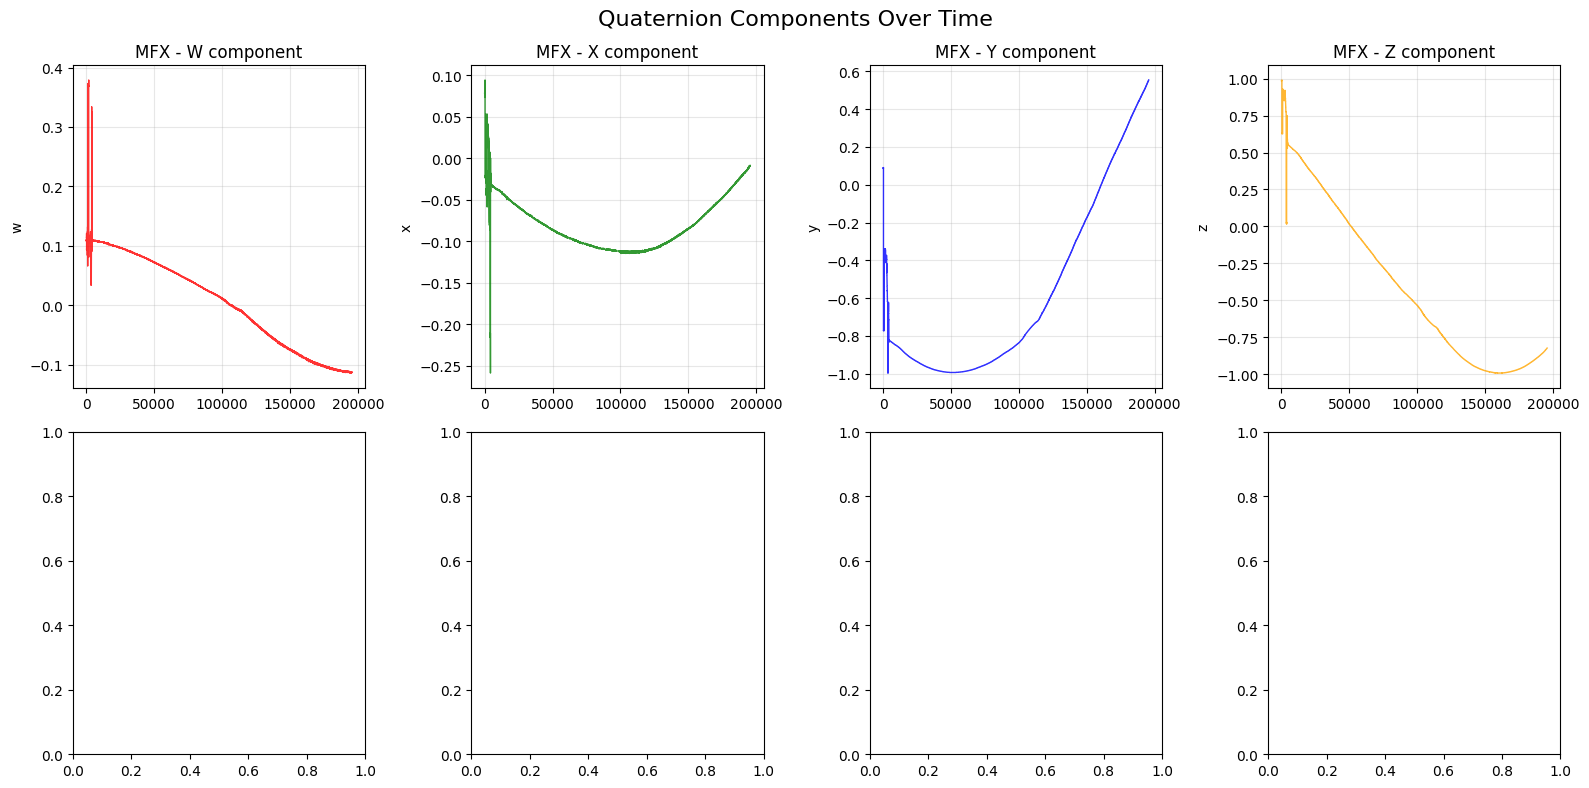

In [97]:
def plot_quaternion_components(df_quats, title="Quaternion Components Over Time"):
    """Plot quaternion components for each type"""
    if df_quats is None or len(df_quats) == 0:
        print("No quaternion data available")
        return
    
    print(df_quats.head())
        
    types = df_quats['type'].unique()
    n_types = max(2,len(types) - 2)
    print(n_types)
    
    fig, axes = plt.subplots(n_types, 4, figsize=(16, 4*n_types))
    if n_types == 1:
        axes = axes.reshape(1, -1)
    
    fig.suptitle(title, fontsize=16)
    
    for i, qtype in enumerate(types):
        if 'RAL' in qtype:
            continue
        qdata = df_quats[df_quats['type'] == qtype]
        time_ms = qdata['relative_time_ms']
        if USE_FAKE_TIME:
            time_ms = list(range(len(qdata)))
        
        # Plot each component
        components = ['w', 'x', 'y', 'z']
        colors = ['red', 'green', 'blue', 'orange']

        for j, (comp, color) in enumerate(zip(components, colors)):
            try:
                axes[i, j].plot(time_ms, qdata[comp], color=color, alpha=0.8, linewidth=1)
                axes[i, j].set_title(f'{qtype} - {comp.upper()} component')
                axes[i, j].set_ylabel(f'{comp}')
                axes[i, j].grid(True, alpha=0.3)
                if i == n_types - 1:  # Bottom row
                    axes[i, j].set_xlabel('Time (ms)')
            except:

                print(comp)
                print(qdata[comp])
                print("whoops")
    
    plt.tight_layout()
    plt.show()

plot_quaternion_components(df_quats)

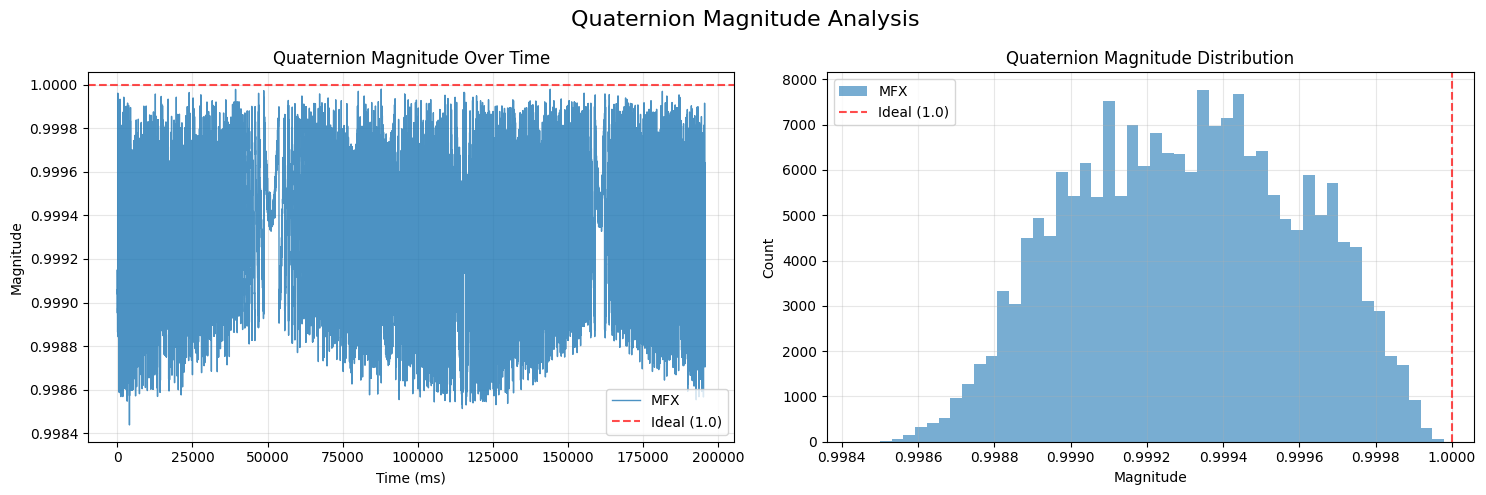

In [98]:
def plot_quaternion_magnitude(df_quats, title="Quaternion Magnitude Analysis"):
    """Plot quaternion magnitudes to check normalization"""
    if df_quats is None or len(df_quats) == 0:
        print("No quaternion data available")
        return
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    
    # Plot magnitude over time
    for qtype in df_quats['type'].unique():
        qdata = df_quats[df_quats['type'] == qtype]
        time_ms = qdata['relative_time_ms']
        if USE_FAKE_TIME:
            time_ms = list(range(len(qdata)))
        axes[0].plot(time_ms, qdata['magnitude'], 
                    label=qtype, alpha=0.8, linewidth=1)
    
    axes[0].axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Ideal (1.0)')
    axes[0].set_title('Quaternion Magnitude Over Time')
    axes[0].set_xlabel('Time (ms)')
    axes[0].set_ylabel('Magnitude')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Histogram of magnitudes
    for qtype in df_quats['type'].unique():
        qdata = df_quats[df_quats['type'] == qtype]
        axes[1].hist(qdata['magnitude'], bins=50, alpha=0.6, label=qtype)
    
    axes[1].axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='Ideal (1.0)')
    axes[1].set_title('Quaternion Magnitude Distribution')
    axes[1].set_xlabel('Magnitude')
    axes[1].set_ylabel('Count')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_quaternion_magnitude(df_quats)

No data found for quaternion type: MDI


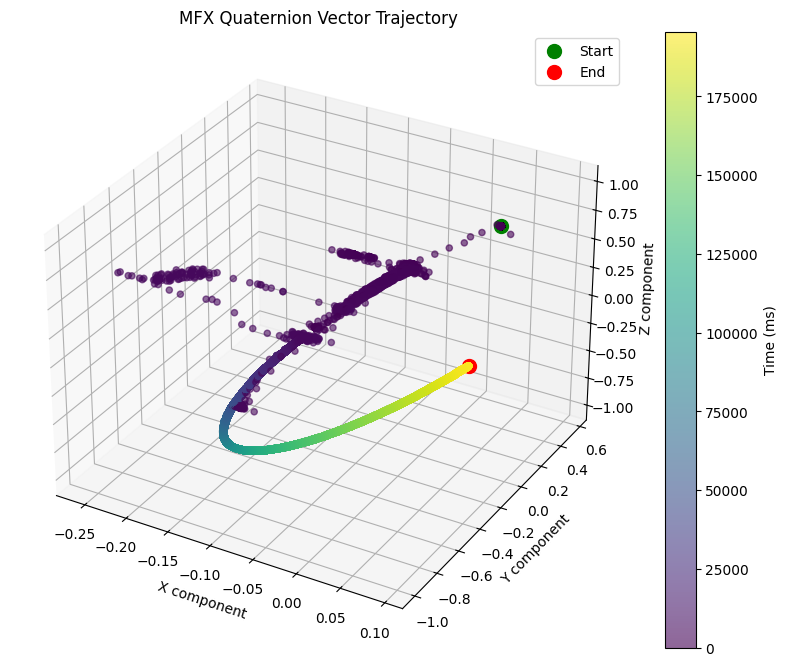

In [99]:
def plot_quaternion_3d_trajectory(df_quats, qtype='MDI_Q', title=None):
    """Plot 3D trajectory of quaternion vector part (x,y,z)"""
    if df_quats is None or len(df_quats) == 0:
        print("No quaternion data available")
        return
    
    qdata = df_quats[df_quats['type'] == qtype]
    if len(qdata) == 0:
        print(f"No data found for quaternion type: {qtype}")
        return
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    time_ms = qdata['relative_time_ms']
    if USE_FAKE_TIME:
        time_ms = list(range(len(qdata)))

    # Color by time for trajectory visualization
    scatter = ax.scatter(qdata['x'], qdata['y'], qdata['z'], 
                        c=time_ms, cmap='viridis', 
                        alpha=0.6, s=20)
    
    # Add start and end points
    ax.scatter(qdata['x'].iloc[0], qdata['y'].iloc[0], qdata['z'].iloc[0], 
              color='green', s=100, label='Start')
    ax.scatter(qdata['x'].iloc[-1], qdata['y'].iloc[-1], qdata['z'].iloc[-1], 
              color='red', s=100, label='End')
    
    ax.set_xlabel('X component')
    ax.set_ylabel('Y component') 
    ax.set_zlabel('Z component')
    ax.set_title(title or f'{qtype} Quaternion Vector Trajectory')
    ax.legend()
    
    # Add colorbar
    plt.colorbar(scatter, ax=ax, label='Time (ms)')
    plt.show()
    
plot_quaternion_3d_trajectory(df_quats, 'MDI')
plot_quaternion_3d_trajectory(df_quats, 'MFX')
    

In [100]:
def compare_quaternions(df_quats, type1='MDI', type2='MFX'):
    """Compare two quaternion types"""
    if df_quats is None or len(df_quats) == 0:
        print("No quaternion data available")
        return
    
    q1_data = df_quats[df_quats['type'] == type1]
    q2_data = df_quats[df_quats['type'] == type2]

    
    if len(q1_data) == 0 or len(q2_data) == 0:
        print(f"Insufficient data for comparison: {type1}({len(q1_data)}) vs {type2}({len(q2_data)})")
        return
    
    if USE_FAKE_TIME:
        q1_data['fake_ts'] = list(range(len(q1_data['timestamp_us'])))
        q2_data['fake_ts'] = list(range(len(q2_data['timestamp_us'])))
        merged = pd.merge(q1_data, q2_data, on='fake_ts', suffixes=('_1', '_2'))
    else:
        q1_data['fake_ts'] = q1_data['timestamp_us']
        q2_data['fake_ts'] = q2_data['timestamp_us']
    
    merged = pd.merge(q1_data, q2_data, on='fake_ts', suffixes=('_1', '_2'))
    if len(merged) == 0:
        print("No matching timestamps between quaternion types")
        return
    
    print(f"Comparing {len(merged)} matched samples between {type1} and {type2}")
    
    # Calculate differences
    components = ['w', 'x', 'y', 'z']
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    
    for i, comp in enumerate(components):
        col1 = f'{comp}_1'
        col2 = f'{comp}_2'
        diff = merged[col1] - merged[col2]
        
        axes[i].plot(merged['fake_ts'], merged[col1], 
                    label=f'{type1}', alpha=0.8)
        axes[i].plot(merged['fake_ts'], merged[col2], 
                    label=f'{type2}', alpha=0.8)
        axes[i].set_title(f'{comp.upper()} Component Comparison')
        axes[i].set_ylabel(f'{comp}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        # Print correlation
        corr = merged[col1].corr(merged[col2])
        print(f"{comp.upper()} correlation: {corr:.4f}")
    
    plt.tight_layout()
    plt.show()

compare_quaternions(df_quats)

Insufficient data for comparison: MDI(0) vs MFX(195574)


Samples in first hour: 7200
195574
7200


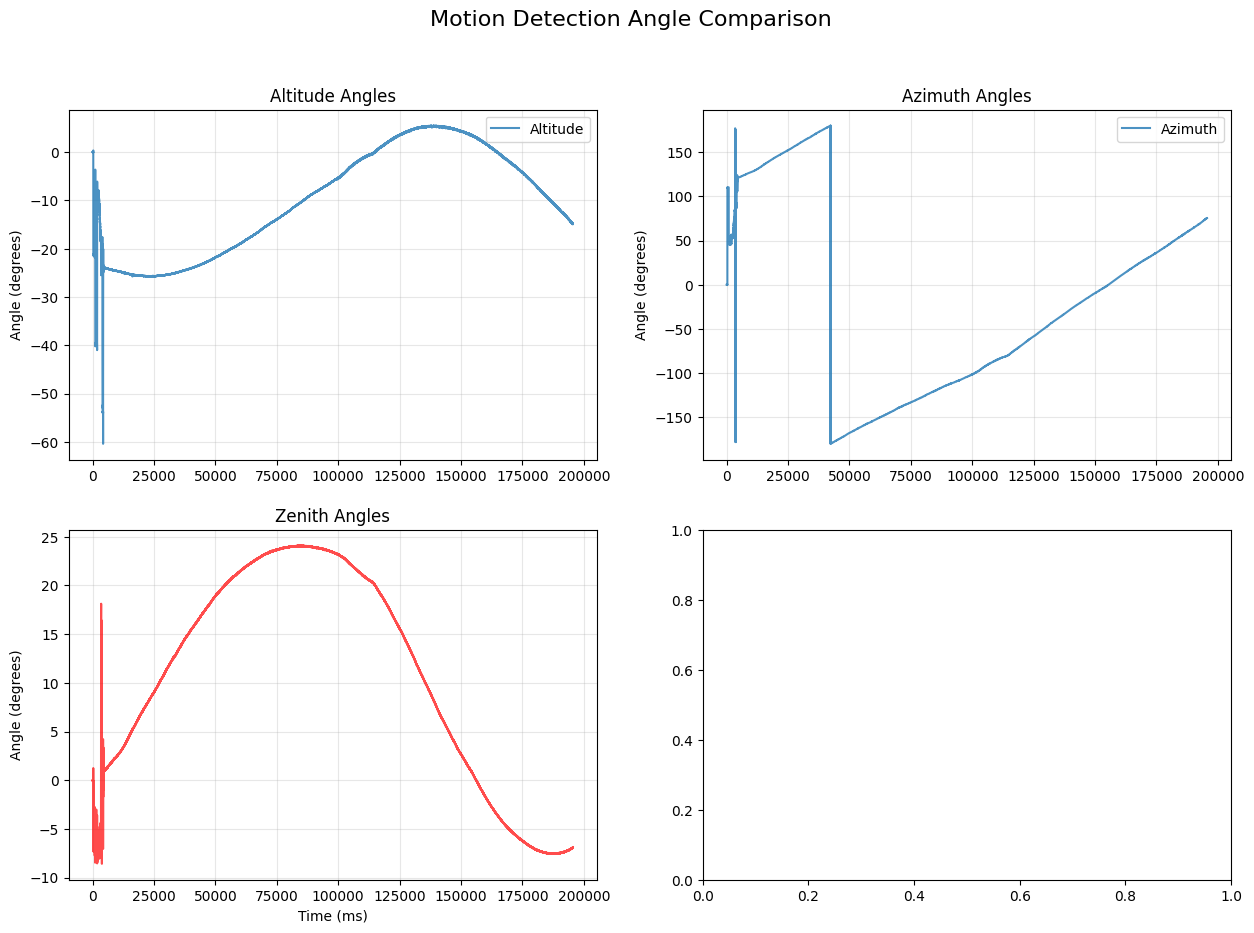

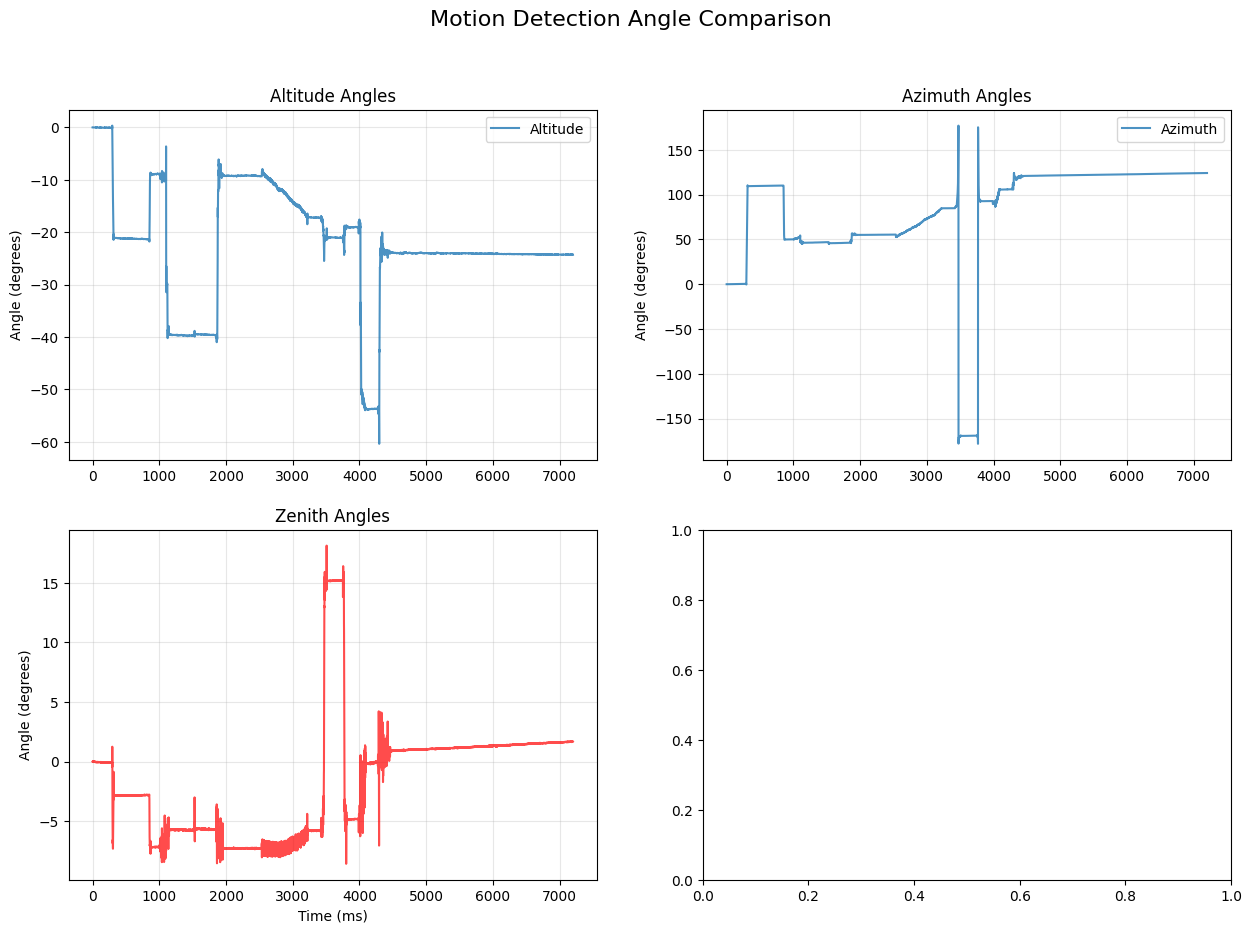

In [110]:
def plot_angle_comparison(df, title="Motion Detection Angle Comparison"):
    if df is None or len(df) == 0:
        print("No angle data available")
        return
    
    
        
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(title, fontsize=16)
    
    time_ms = df['relative_time_ms']
    if USE_FAKE_TIME:
        time_ms = list(range(len(df['relative_time_ms'])))

    title_alt = 'Altitude'
    title_azi = 'Azimuth'
    if 'mdi_altitude' in df.columns:
        df['altitude'] = df['mdi_altitude']
        title_alt += " MDI"
    if 'mfx_azimuth' in df.columns:
        df['azimuth'] = df['mfx_azimuth']
        title_azi += " MFX"
    
    axes[0,0].plot(time_ms, df['altitude'], label=title_alt, alpha=0.8)
    axes[0,0].set_title('Altitude Angles')
    axes[0,0].set_ylabel('Angle (degrees)')
    axes[1,0].set_xlabel('Time (ms)')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    axes[0,1].plot(time_ms, df['azimuth'], label=title_azi, alpha=0.8)
    axes[0,1].set_title('Azimuth Angles')
    axes[0,1].set_ylabel('Angle (degrees)')
    axes[1,0].set_xlabel('Time (ms)')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    try:
        axes[1,0].plot(time_ms, df['zenith'], color='red', alpha=0.7)
        axes[1,0].set_title('Zenith Angles')
        axes[1,0].set_ylabel('Angle (degrees)')
        axes[1,0].set_xlabel('Time (ms)')
        axes[1,0].grid(True, alpha=0.3)
    except:
        print("Could not plot zenith")

        if 'mfx_altitude' in df.columns:
            df['altitude'] = df['mfx_altitude']
        if 'mdi_azimuth' in df.columns:
            df['azimuth'] = df['mdi_azimuth']
        
        axes[1,0].plot(time_ms, df['altitude'], label='Altitude MFX', alpha=0.8)
        axes[1,0].set_title('Altitude Angles')
        axes[1,0].set_ylabel('Angle (degrees)')
        axes[1,0].set_xlabel('Time (ms)')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        axes[1,1].plot(time_ms, df['azimuth'], label='Azimuth MDI', alpha=0.8)
        axes[1,1].set_title('Azimuth Angles')
        axes[1,1].set_ylabel('Angle (degrees)')
        axes[1,0].set_xlabel('Time (ms)')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
plot_angle_comparison(df)
# First hour:
samples = 2 * 60 * 60
print("Samples in first hour:", samples)
df_first_hour = df[:samples]
print(len(df))
print(len(df_first_hour))
plot_angle_comparison(df_first_hour)

KeyError: 'mfx_altitude'

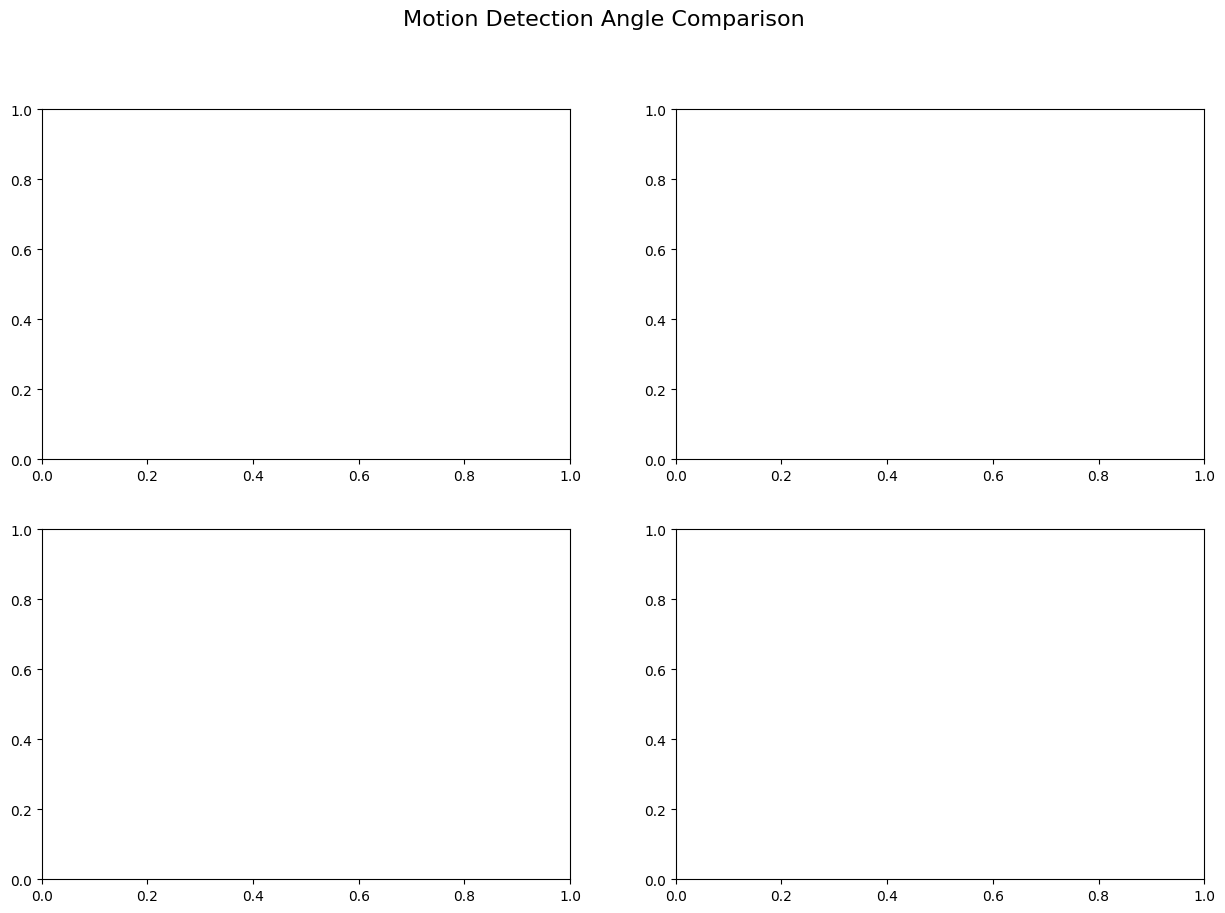

In [102]:
def plot_angle_comparison(df, title="Motion Detection Angle Comparison"):
    """Plot comparison between MFX and MDI outputs"""
    if df is None or len(df) == 0:
        print("No angle data available")
        return
        
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(title, fontsize=16)
    
    time_ms = df['relative_time_ms']
    if USE_FAKE_TIME:
        time_ms = list(range(len(df['relative_time_ms'])))
    
    # Altitude comparison
    axes[0,0].plot(time_ms, df['mfx_altitude'], label='MFX Altitude', alpha=0.8)
    axes[0,0].plot(time_ms, df['mdi_altitude'], label='MDI Altitude', alpha=0.8)
    axes[0,0].set_title('Altitude Angles')
    axes[0,0].set_ylabel('Angle (degrees)')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Azimuth comparison
    axes[0,1].plot(time_ms, df['mfx_azimuth'], label='MFX Azimuth', alpha=0.8)
    axes[0,1].plot(time_ms, df['mdi_azimuth'], label='MDI Azimuth', alpha=0.8)
    axes[0,1].set_title('Azimuth Angles')
    axes[0,1].set_ylabel('Angle (degrees)')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Altitude difference
    axes[1,0].plot(time_ms, df['altitude_diff'], color='red', alpha=0.7)
    axes[1,0].set_title('Altitude Difference (|MFX - MDI|)')
    axes[1,0].set_ylabel('Difference (degrees)')
    axes[1,0].set_xlabel('Time (ms)')
    axes[1,0].grid(True, alpha=0.3)
    
    # Azimuth difference
    axes[1,1].plot(time_ms, df['azimuth_diff'], color='orange', alpha=0.7)
    axes[1,1].set_title('Azimuth Difference (|MFX - MDI|)')
    axes[1,1].set_ylabel('Difference (degrees)')
    axes[1,1].set_xlabel('Time (ms)')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
plot_angle_comparison(df)

CORRELATION ANALYSIS

Altitude correlation (MFX vs MDI): 0.2336
Azimuth correlation (MFX vs MDI): 0.6159
MFX cross-correlation (Alt vs Az): -0.9732
MDI cross-correlation (Alt vs Az): 0.2726


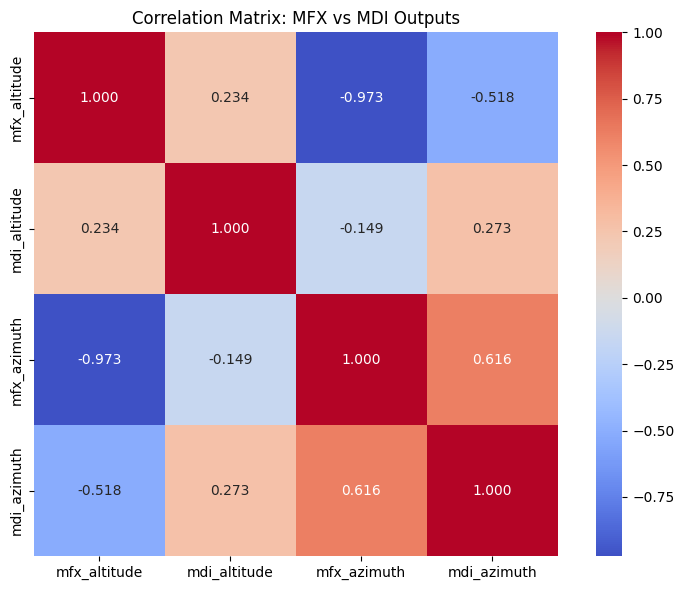

(0.2336227753690315, 0.6158722757941716, -0.9731932186962445, 0.2726113370283344)


In [ ]:
def analyze_correlation(df):
    print("CORRELATION ANALYSIS")
    print()
    
    alt_corr = df['mfx_altitude'].corr(df['mdi_altitude'])
    az_corr = df['mfx_azimuth'].corr(df['mdi_azimuth'])
    
    print(f"Altitude correlation (MFX vs MDI): {alt_corr:.4f}")
    print(f"Azimuth correlation (MFX vs MDI): {az_corr:.4f}")
    
    # Cross-correlations (these should be LOW if fix is working)
    mfx_cross = df['mfx_altitude'].corr(df['mfx_azimuth'])
    mdi_cross = df['mdi_altitude'].corr(df['mdi_azimuth'])
    
    print(f"MFX cross-correlation (Alt vs Az): {mfx_cross:.4f}")
    print(f"MDI cross-correlation (Alt vs Az): {mdi_cross:.4f}")
    
    # Create correlation heatmap
    corr_data = df[['mfx_altitude', 'mdi_altitude', 'mfx_azimuth', 'mdi_azimuth']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f')
    plt.title('Correlation Matrix: MFX vs MDI Outputs')
    plt.tight_layout()
    plt.show()
    
    return alt_corr, az_corr, mfx_cross, mdi_cross
correlations = analyze_correlation(df)
print(correlations)



Total movement samples: 3586, 10% = 359 samples
MOVEMENT DETECTION

Threshold: 1° change
Movement periods: 1380 samples (38.5%)


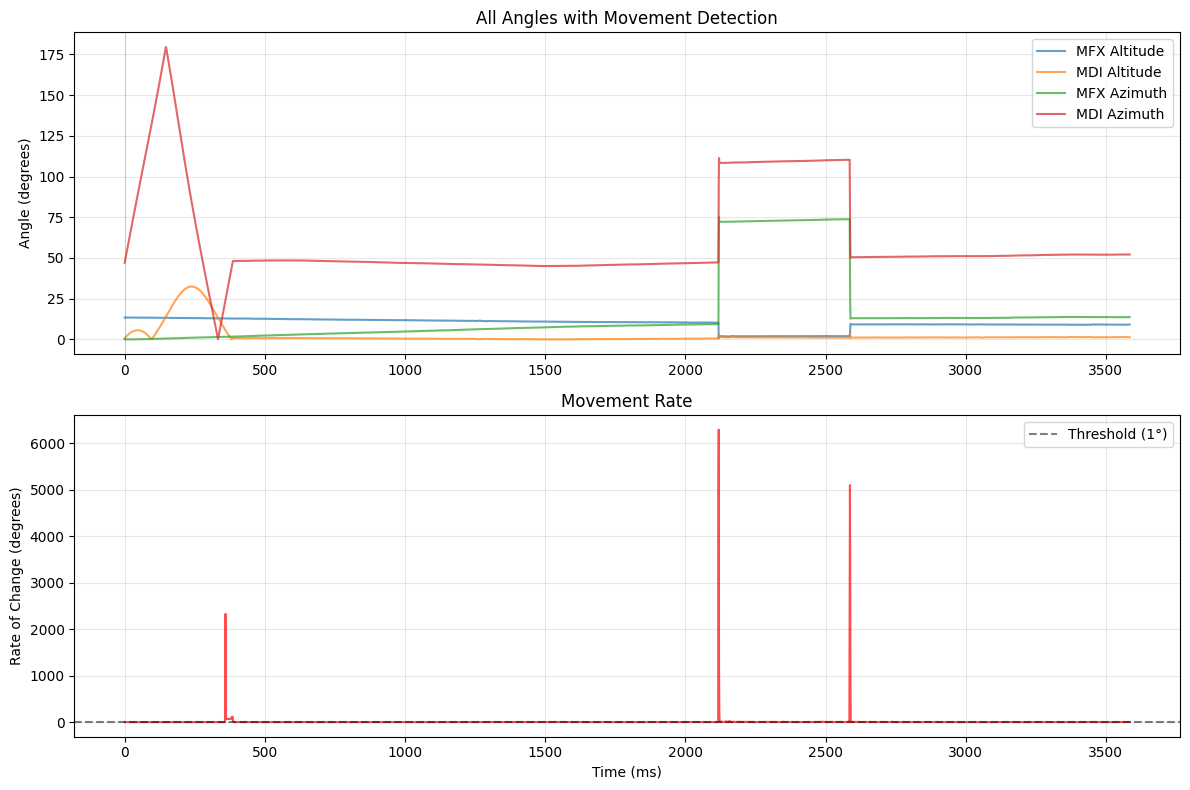

In [ ]:
def detect_movement_periods(df, threshold=1.0):
    # Calculate movement indicators
    df['total_movement'] = df['mfx_altitude'] + df['mfx_azimuth'] + df['mdi_altitude'] + df['mdi_azimuth']
    # df['total_movement'] = df['mfx_azimuth'] + df['mdi_altitude']
    # df['total_movement'] = df['mfx_azimuth']
    ten_perc = round(10/100* len(df['total_movement']))
    print(f"Total movement samples: {len(df['total_movement'])}, 10% = {ten_perc} samples")
    df.loc[0:ten_perc, 'total_movement'] = 0
    df.loc[len(df['total_movement'])-(2*ten_perc): , 'total_movement'] = df['total_movement'].iloc[-(2*ten_perc+1):]                    
    df['movement_rate'] = np.abs(np.gradient(df['total_movement'], 1/104)) # calculate rate of change in degrees per second given 104Hz sampling rate based on rate = (current - previous) / time_interval
    
    # Find movement periods
    movement_mask = df['movement_rate'] > threshold
    
    print(f"MOVEMENT DETECTION")
    print()
    print(f"Threshold: {threshold}° change")
    print(f"Movement periods: {movement_mask.sum()} samples ({movement_mask.sum()/len(df)*100:.1f}%)")
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    time_ms = df['relative_time_ms']

    if USE_FAKE_TIME:
        time_ms = pd.DataFrame(range(len(df['relative_time_ms'])))
    
    axes[0].plot(time_ms, df['mfx_altitude'], label='MFX Altitude', alpha=0.7)
    axes[0].plot(time_ms, df['mdi_altitude'], label='MDI Altitude', alpha=0.7)
    axes[0].plot(time_ms, df['mfx_azimuth'], label='MFX Azimuth', alpha=0.7)
    axes[0].plot(time_ms, df['mdi_azimuth'], label='MDI Azimuth', alpha=0.7)
    
    movement_times = time_ms[movement_mask]
    for t in movement_times:
        axes[0].axvline(x=t, color='red', alpha=0.3, linewidth=0.5)
    
    axes[0].set_title('All Angles with Movement Detection')
    axes[0].set_ylabel('Angle (degrees)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(time_ms, df['movement_rate'], color='red', alpha=0.7)
    axes[1].axhline(y=threshold, color='black', linestyle='--', alpha=0.5, label=f'Threshold ({threshold}°)')
    axes[1].set_title('Movement Rate')
    axes[1].set_ylabel('Rate of Change (degrees)')
    axes[1].set_xlabel('Time (ms)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
detect_movement_periods(df, 1)

In [ ]:
def check_axis_independence(df):
    """Check if altitude and azimuth are properly independent"""
    print("AXIS INDEPENDENCE CHECK")
    print()
    
    alt_change_threshold = 2.0  # degrees
    az_change_threshold = 2.0   # degrees
    
    alt_only_mfx = (df['mfx_altitude'] > alt_change_threshold) & (df['mfx_azimuth'] < az_change_threshold)
    alt_only_mdi = (df['mdi_altitude'] > alt_change_threshold) & (df['mdi_azimuth'] < az_change_threshold)
    
    # Find periods where only azimuth changes significantly  
    az_only_mfx = (df['mfx_azimuth'] > az_change_threshold) & (df['mfx_altitude'] < alt_change_threshold)
    az_only_mdi = (df['mdi_azimuth'] > az_change_threshold) & (df['mdi_altitude'] < alt_change_threshold)
    
    print(f"Pure altitude events (MFX): {alt_only_mfx.sum()} samples")
    print(f"Pure altitude events (MDI): {alt_only_mdi.sum()} samples")
    print(f"Pure azimuth events (MFX): {az_only_mfx.sum()} samples")
    print(f"Pure azimuth events (MDI): {az_only_mdi.sum()} samples")
    
    both_change_mfx = (df['mfx_altitude'] > alt_change_threshold) & (df['mfx_azimuth'] > az_change_threshold)
    both_change_mdi = (df['mdi_altitude'] > alt_change_threshold) & (df['mdi_azimuth'] > az_change_threshold)
    
    print(f"Both changing together (MFX): {both_change_mfx.sum()} samples - {'PROBLEM' if both_change_mfx.sum() > 0 else 'GOOD'}")
    print(f"Both changing together (MDI): {both_change_mdi.sum()} samples - {'PROBLEM' if both_change_mdi.sum() > 0 else 'GOOD'}")
check_axis_independence(df)

AXIS INDEPENDENCE CHECK

Pure altitude events (MFX): 438 samples
Pure altitude events (MDI): 5 samples
Pure azimuth events (MFX): 445 samples
Pure azimuth events (MDI): 3236 samples
Both changing together (MFX): 2702 samples - PROBLEM
Both changing together (MDI): 345 samples - PROBLEM


In [ ]:
def comprehensive_system_health_check():
    """Comprehensive system health analysis"""
    print("="*60)
    print("COMPREHENSIVE SYSTEM HEALTH CHECK")
    print("="*60)
    
    health_score = 100  # Start with perfect score
    issues = []
    warnings = []
    
    # Check each dataset
    datasets_status = {}
    for name, dataset in data.items():
        if dataset is not None and len(dataset) > 0:
            datasets_status[name] = f"Good {len(dataset)} samples"
        else:
            datasets_status[name] = "Bad No data"
            if name in ['angles', 'raw_data']:  # Critical datasets
                health_score -= 20
                issues.append(f"Missing {name} data")
            else:
                health_score -= 5
                warnings.append(f"Missing {name} data")
    
    print("Dataset Status:")
    for name, status in datasets_status.items():
        print(f"  {name}: {status}")
    
    # Sensor-specific checks
    if df_raw is not None and len(df_raw) > 0:
        print("\nSensor Health:")
        
        # Accelerometer check
        accel_mag_mean = df_raw['accel_magnitude'].mean()
        accel_expected = 1000  # mg for 1g
        accel_error = abs(accel_mag_mean - accel_expected) / accel_expected * 100
        
        if accel_error < 5:
            print(f"  Accelerometer: Good {accel_mag_mean:.1f}mg (expected ~{accel_expected}mg)")
        elif accel_error < 15:
            print(f"  Accelerometer: Mod {accel_mag_mean:.1f}mg (expected ~{accel_expected}mg)")
            health_score -= 10
            warnings.append(f"Accelerometer magnitude off by {accel_error:.1f}%")
        else:
            print(f"  Accelerometer: Bad {accel_mag_mean:.1f}mg (expected ~{accel_expected}mg)")
            health_score -= 20
            issues.append(f"Accelerometer magnitude off by {accel_error:.1f}%")
        
        # Gyroscope check
        gyro_mag_mean = df_raw['gyro_magnitude'].mean()
        if gyro_mag_mean < 1.0:
            print(f"  Gyroscope: Good {gyro_mag_mean:.3f}dps (low noise)")
        elif gyro_mag_mean < 5.0:
            print(f"  Gyroscope: Mod {gyro_mag_mean:.3f}dps (moderate noise)")
            health_score -= 5
            warnings.append(f"Gyroscope noise: {gyro_mag_mean:.3f}dps")
        else:
            print(f"  Gyroscope: Bad {gyro_mag_mean:.3f}dps (high noise)")
            health_score -= 15
            issues.append(f"High gyroscope noise: {gyro_mag_mean:.3f}dps")
    
    # Temperature stability check
    if df_temp is not None and len(df_temp) > 0:
        temp_std = df_temp['temperature_celsius'].std()
        temp_mean = df_temp['temperature_celsius'].mean()
        
        if temp_std < 0.5:
            print(f"  Temperature: Good {temp_mean:.1f}°C ± {temp_std:.2f}°C (stable)")
        elif temp_std < 2.0:
            print(f"  Temperature: Mod {temp_mean:.1f}°C ± {temp_std:.2f}°C (variable)")
            health_score -= 5
            warnings.append(f"Temperature variability: ±{temp_std:.2f}°C")
        else:
            print(f"  Temperature: Bad {temp_mean:.1f}°C ± {temp_std:.2f}°C (unstable)")
            health_score -= 10
            issues.append(f"Temperature instability: ±{temp_std:.2f}°C")
    
    # Motion detection algorithm check
    if df is not None and len(df) > 0:
        print("\nMotion Detection:")
        
        # Check MFX vs MDI correlation
        alt_corr = df['mfx_altitude'].corr(df['mdi_altitude'])
        az_corr = df['mfx_azimuth'].corr(df['mdi_azimuth'])
        
        if alt_corr > 0.9:
            print(f"  Altitude correlation: Good {alt_corr:.3f}")
        elif alt_corr > 0.7:
            print(f"  Altitude correlation: Mod {alt_corr:.3f}")
            health_score -= 10
            warnings.append(f"Moderate altitude correlation: {alt_corr:.3f}")
        else:
            print(f"  Altitude correlation: Bad {alt_corr:.3f}")
            health_score -= 20
            issues.append(f"Poor altitude correlation: {alt_corr:.3f}")
        
        if az_corr > 0.9:
            print(f"  Azimuth correlation: Good {az_corr:.3f}")
        elif az_corr > 0.7:
            print(f"  Azimuth correlation: Mod {az_corr:.3f}")
            health_score -= 10
            warnings.append(f"Moderate azimuth correlation: {az_corr:.3f}")
        else:
            print(f"  Azimuth correlation: Bad {az_corr:.3f}")
            health_score -= 20
            issues.append(f"Poor azimuth correlation: {az_corr:.3f}")
    
    # Quaternion normalization check
    if df_quats is not None and len(df_quats) > 0:
        print("\nQuaternion Quality:")
        for qtype in df_quats['type'].unique():
            qdata = df_quats[df_quats['type'] == qtype]
            mag_mean = qdata['magnitude'].mean()
            mag_std = qdata['magnitude'].std()
            
            if abs(mag_mean - 1.0) < 0.01 and mag_std < 0.01:
                print(f"  {qtype}: Good Magnitude {mag_mean:.4f} ± {mag_std:.4f}")
            elif abs(mag_mean - 1.0) < 0.05 and mag_std < 0.05:
                print(f"  {qtype}: Mod Magnitude {mag_mean:.4f} ± {mag_std:.4f}")
                health_score -= 5
                warnings.append(f"{qtype} quaternion normalization issue")
            else:
                print(f"  {qtype}: Bad Magnitude {mag_mean:.4f} ± {mag_std:.4f}")
                health_score -= 15
                issues.append(f"{qtype} quaternion not normalized properly")
    
    # Overall health assessment
    print(f"\n{'='*60}")
    if health_score >= 90:
        print(f"OVERALL SYSTEM HEALTH: EXCELLENT ({health_score}/100)")
    elif health_score >= 75:
        print(f"OVERALL SYSTEM HEALTH: GOOD ({health_score}/100)")
    elif health_score >= 50:
        print(f"OVERALL SYSTEM HEALTH: FAIR ({health_score}/100)")
    else:
        print(f"OVERALL SYSTEM HEALTH: POOR ({health_score}/100)")
    
    if issues:
        print(f"\nCRITICAL ISSUES ({len(issues)}):")
        for issue in issues:
            print(f"  - {issue}")
    
    if warnings:
        print(f"\nWARNINGS ({len(warnings)}):")
        for warning in warnings:
            print(f"  - {warning}")
    
    if not issues and not warnings:
        print("\nAll systems operating nominally!")
    
    print("="*60)

comprehensive_system_health_check()

COMPREHENSIVE SYSTEM HEALTH CHECK
Dataset Status:
  quaternions: Good 33107 samples
  raw_data: Good 18763 samples
  gyro_bias: Bad No data
  temperature: Good 378 samples
  angles: Good 3586 samples

Sensor Health:
  Accelerometer: Good 1013.8mg (expected ~1000mg)
  Gyroscope: Mod 1.274dps (moderate noise)
  Temperature: Good 37.4°C ± 0.17°C (stable)

Motion Detection:
  Altitude correlation: Bad 0.234
  Azimuth correlation: Bad 0.616

Quaternion Quality:
  MFX: Good Magnitude 0.9993 ± 0.0003
  MDI: Good Magnitude 0.9992 ± 0.0003
  RAL: Good Magnitude 0.9991 ± 0.0000
  RAZ: Good Magnitude 0.9995 ± 0.0000

OVERALL SYSTEM HEALTH: FAIR (50/100)

CRITICAL ISSUES (2):
  - Poor altitude correlation: 0.234
  - Poor azimuth correlation: 0.616

WARNINGS (2):
  - Missing gyro_bias data
  - Gyroscope noise: 1.274dps


In [ ]:
print()
print("SUMMARY STATISTICS")
print()
print(df[['mfx_altitude', 'mdi_altitude', 'mfx_azimuth', 'mdi_azimuth', 
            'altitude_diff', 'azimuth_diff']].describe())

print()
print("DIAGNOSIS")
print()
alt_corr, az_corr, mfx_cross, mdi_cross = correlations

if alt_corr > 0.9:
    print(f"MFX and MDI altitude measurements are highly correlated {alt_corr}")
else:
    print(f"MFX and MDI altitude measurements show low correlation {alt_corr}")
    
if az_corr > 0.9:
    print(f"MFX and MDI azimuth measurements are highly correlated {az_corr}")
else:
    print(f"MFX and MDI azimuth measurements show low correlation {az_corr}")
    


SUMMARY STATISTICS

       mfx_altitude  mdi_altitude  mfx_azimuth  mdi_azimuth  altitude_diff  \
count   3586.000000   3586.000000  3586.000000  3586.000000    3586.000000   
mean       9.715175      2.313673    16.223333    60.618765       8.690642   
std        3.305905      5.733813    22.406020    28.219511       3.768017   
min        0.673000      0.000000     0.000000     0.112000       0.050000   
25%        9.122000      0.413000     4.389250    46.494000       7.789250   
50%       10.585000      1.033000     8.504500    48.495500       9.973000   
75%       11.903750      1.260750    13.298250    52.073750      11.181000   
max       13.407000     32.485000    75.149000   179.629000      19.396000   

       azimuth_diff  
count   3586.000000  
mean      44.396840  
std       22.790996  
min        0.185000  
25%       37.539000  
50%       38.076000  
75%       42.155000  
max      179.152000  

DIAGNOSIS

MFX and MDI altitude measurements show low correlation 0.233622775